In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import random
plt.style.use('fivethirtyeight')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


Physical devices cannot be modified after being initialized


In [8]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

base_dir = 'C:/Users/zzang/Desktop/archive/img/'
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'val/')

# Directory with our training pictures
train_bed_dir = os.path.join(train_dir, 'bed')
train_chair_dir = os.path.join(train_dir, 'chair')
train_sofa_dir = os.path.join(train_dir, 'sofa')
train_swivelchair_dir = os.path.join(train_dir, 'swivelchair')
train_table_dir = os.path.join(train_dir, 'table')

# Directory with our validation pictures
validation_bed_dir = os.path.join(validation_dir, 'bed')
validation_chair_dir = os.path.join(validation_dir, 'chair')
validation_sofa_dir = os.path.join(validation_dir, 'sofa')
validation_swivelchair_dir = os.path.join(validation_dir, 'swivelchair')
validation_table_dir = os.path.join(validation_dir, 'table')

train_bed_fnames = os.listdir(train_bed_dir)
train_chair_fnames = os.listdir(train_chair_dir)
train_sofa_fnames = os.listdir(train_sofa_dir)
train_swivelchair_fnames = os.listdir(train_swivelchair_dir)
train_table_fnames = os.listdir(train_table_dir)

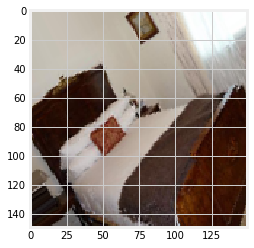

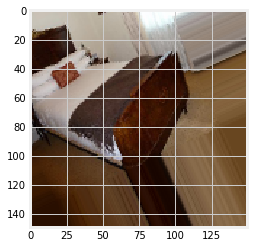

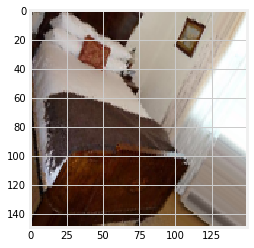

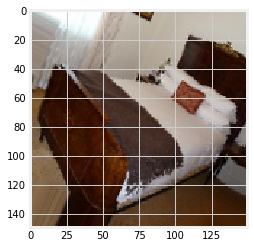

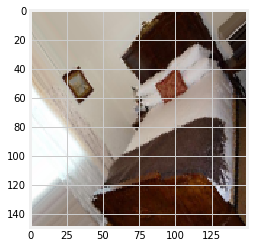

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_bed_dir, train_bed_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break

In [10]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [29]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)
print(x)
# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(256, input_dim = 22500, activation='relu')(x)
print(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
print(x)
# Create output layer with a single node and sigmoid activation
output = layers.Dense(5, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=20,
      verbose=2)

Tensor("flatten_7/Reshape:0", shape=(None, 18496), dtype=float32)
Tensor("dense_14/Relu:0", shape=(None, 1024), dtype=float32)
Tensor("dropout_7/cond/Identity:0", shape=(None, 1024), dtype=float32)


In [28]:
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 64)      

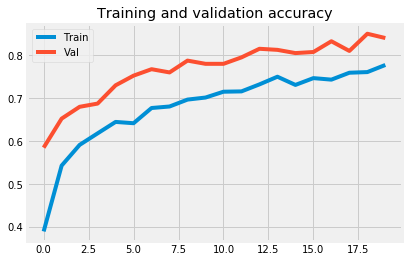

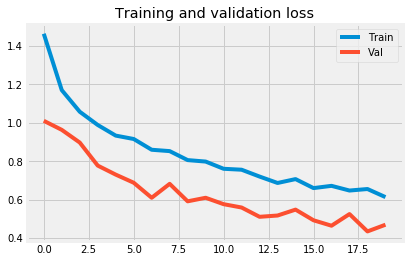

In [27]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend(['Train', 'Val'], loc='upper right')

- 150 x 150 pixel에서 5개 클래스 중 하나를 맞히는 것
- 150 x 150 = 22500개의 1차원 배열로 바꿔 주어야하니까 

#### Inception-v3

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [13]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [14]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import Model
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2)

Epoch 1/40
100/100 - 11s - loss: 1.6593 - accuracy: 0.7253 - val_loss: 0.4059 - val_accuracy: 0.8900
Epoch 2/40
100/100 - 11s - loss: 0.5223 - accuracy: 0.8493 - val_loss: 0.1091 - val_accuracy: 0.9550
Epoch 3/40
100/100 - 11s - loss: 0.3972 - accuracy: 0.8574 - val_loss: 0.1465 - val_accuracy: 0.9600
Epoch 4/40
100/100 - 11s - loss: 0.3682 - accuracy: 0.8840 - val_loss: 0.1790 - val_accuracy: 0.9350
Epoch 5/40
100/100 - 11s - loss: 0.3571 - accuracy: 0.8790 - val_loss: 0.1012 - val_accuracy: 0.9650
Epoch 6/40
100/100 - 11s - loss: 0.3776 - accuracy: 0.8800 - val_loss: 0.1693 - val_accuracy: 0.9500
Epoch 7/40
100/100 - 11s - loss: 0.2967 - accuracy: 0.9045 - val_loss: 0.2655 - val_accuracy: 0.9050
Epoch 8/40
100/100 - 11s - loss: 0.3371 - accuracy: 0.8975 - val_loss: 0.1505 - val_accuracy: 0.9500
Epoch 9/40
100/100 - 11s - loss: 0.2696 - accuracy: 0.9040 - val_loss: 0.1393 - val_accuracy: 0.9450
Epoch 10/40
100/100 - 11s - loss: 0.3077 - accuracy: 0.9012 - val_loss: 0.1579 - val_accura

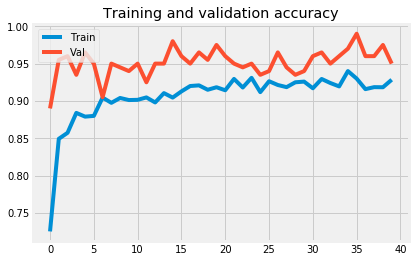

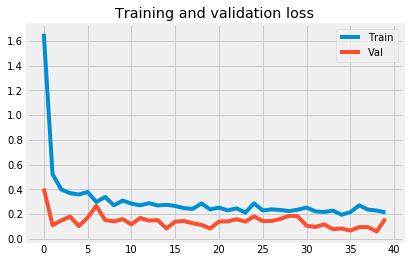

In [24]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend(['Train', 'Val'], loc='upper right')

- pre-trained model 사용함
- epochs을 40회로 설정
- learning rate 0.001
- dense dropout 0.5